<a href="https://colab.research.google.com/github/gefengjiao0325-design/machineLearn/blob/main/11%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#导入TensorFlow库
import tensorflow as tf
#从TensorFlow中专门导入Keras模块
from tensorflow import keras
#导入NumPy数值计算库
import numpy as np
#导入Matplotlib库的绘图模块
import matplotlib.pyplot as plt

In [3]:
#获取MNIST数据集的访问接口，返回训练集和测试集
mnist=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#分别打印训练集和测试集标签数据、图片数据的形状
print('train_images.shape=',train_images.shape)
print('test_images.shape=',test_images.shape)
print('train_labels.shape=',train_labels.shape)
print('test_labels.shape=',test_labels.shape)

train_images.shape= (60000, 28, 28)
test_images.shape= (10000, 28, 28)
train_labels.shape= (60000,)
test_labels.shape= (10000,)


In [5]:
#打印出train_image[6000]图像,格式化输出，确保每个数字占4个字符宽度
#숙제1.train_image[6000] 이미지를 출력하세요.
num=train_images[6000]
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(num[i][j]),end='')
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 200 255 229   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50 200 253 251 102   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 236 254 224  98   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   4  21 236 254 217  74   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  70 254 253 252  67   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  11 192 254 253 108   0   0   0   0   0   0   0   0

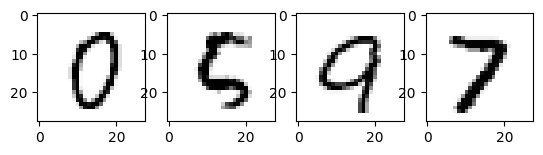

In [6]:
#创建一个新的图形窗口
#숙제2.ax1,ax2,ax3,ax4에 인덱스 [1000],[2000],[3000],[4000]을 갖는 이미지를 표시하세요.
fig=plt.figure()
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)

ax1.imshow(train_images[1000],cmap='Grays')
ax2.imshow(train_images[2000],cmap='Greys')
ax3.imshow(train_images[3000],cmap='Greys')
ax4.imshow(train_images[4000],cmap='Greys')

In [12]:
#分别打印下标是1000、2000、3000、4000的值
print('train_labels[1000]=',train_labels[1000])
print('train_labels[2000]=',train_labels[2000])
print('train_labels[3000]=',train_labels[3000])
print('train_labels[4000]=',train_labels[4000])

train_labels[1000]= 0
train_labels[2000]= 5
train_labels[3000]= 9
train_labels[4000]= 7


In [13]:
#归一化处理，将图片像素值的范围从0-255缩小到0-1
train_images,test_images=train_images/255,test_images/255

In [20]:
#숙제3.은닉층의 노드 수를 256개에서 128개로 변경하세요.
model=keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Input(shape=(28,28)),#使用专门的Input层来定义输入形状
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#使用adam优化器
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5961 - loss: 1.6296
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8678 - loss: 0.5109
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8952 - loss: 0.3842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9047 - loss: 0.3412
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9085 - loss: 0.3178


In [17]:
#숙제4.최적화 함수로 adam 함수 대신 sgd 함수를 사용하세요.
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9158 - loss: 0.2989
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9157 - loss: 0.2976
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9169 - loss: 0.2956
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9153 - loss: 0.2963
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9173 - loss: 0.2918


In [19]:
#숙제5.epochs=2와 epochs=5에 대한 정확도 값을 비교하세요.
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(train_images,train_labels,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9137 - loss: 0.3024
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9158 - loss: 0.2937


**결과:**
epochs=2의 최종 정확도는 0.9158이었고, epochs=5의 최종 정확도는 0.9173이었습니다. 이는 전체적으로 0.15%의 소폭 향상을 나타냅니다. epochs=5의 정확도는 91.53%와 91.73% 사이에서 변동하며 "진동하지만 전반적으로 증가하는" 경향을 보인 반면, epochs=2의 경우 두 epoch 만에 정확도가 91.39%에서 91.58%로 향상되어 안정적인 상승 추세를 보였습니다.

**결과 분석:**
이 모델은 epochs=2에서 이미 91.58%의 비교적 높은 정확도를 달성했지만, 추가 개선의 여지가 제한적이고 한계 수익률 체감(deciming marginal returns)을 보였습니다. epochs=5의 다섯 가지 결과는 감소를 보였는데, 이는 각 epoch가 1,875개의 배치로 구성되고 배치 샘플링 순서가 정확도 계산에 영향을 미치기 때문에 딥러닝 학습에서 흔히 나타나는 변동입니다.

---


**结果：**
Epochs=2的最终准确率是0.9158、而Epochs=5是0.9173。总体有0.15%的轻微提升。epochs=5的准确率在91.53%-91.73%之间波动，呈现“震荡但总体上升”的趋势，而epochs=2只经历了两个epochs，准确率从91.39%提升到91.58%，呈稳定上升趋势

**结果分析：**
模型在epochs=2时已经达到91.58%的较高准确率，后续的提升空间有限，存在边际收益递减的情况；epochs=5的五个结果中存在回落情况，这种波动在深度学习训练中很常见，因为每个epochs有1875个批次，批次采样顺序不同会影响准确率计算